# Nonclassicality of Sleeping Beauty
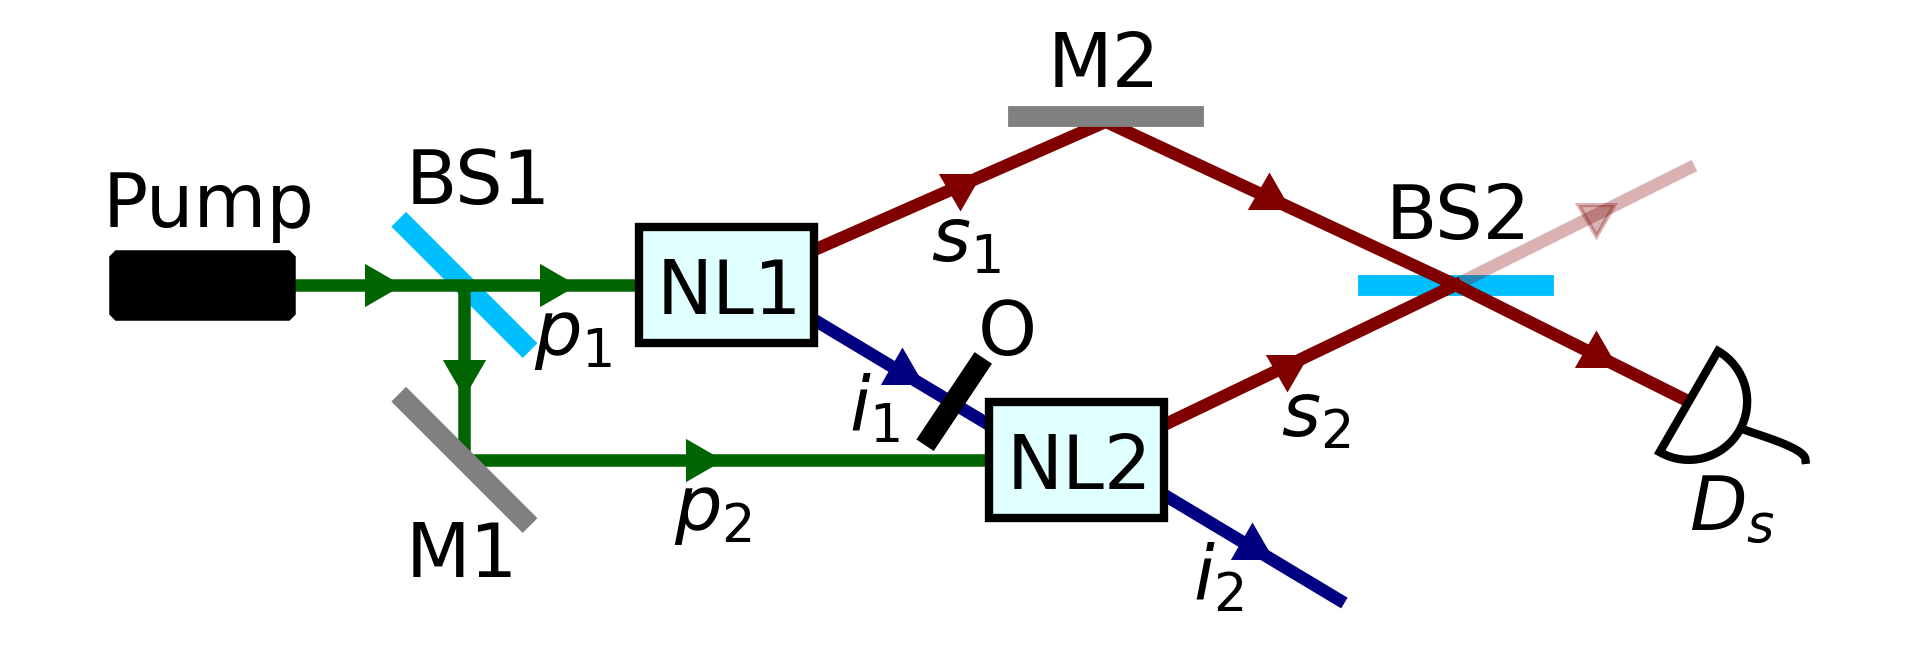


In [1]:
#author: Ozra
import sympy as sp #SymPy is a Python library for symbolic mathematics.
import numpy as np 
from sympy import *
import itertools
import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300
from collections import OrderedDict
from functools import reduce
#define path
Path = ['a', 'b' , 'c', 'd' , 'e','f'] 
a, b , c, d ,e, f  = map(sp.IndexedBase,Path)
p, p1 , p2, p3, p4= map(sp.IndexedBase, ['p','p1','p2','p3','p4'])
a_i, a_s , b_i, b_s, c_s, c_i, d_i, d_s= map(sp.IndexedBase, ['a_i','a_s','b_i','b_s','c_s','c_i', 'd_i', 'd_s']) #for idler and signal
PossiblePath =(list(itertools.combinations(Path,2)))
#degree of freedom
n ,m, l,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11, coeff = map(sp.Wild,['n','m','l' ,'l1','l2','l3','l4','l5','l6','l7','l8','l9','l10','l11','coeff' ]) 
cof = 1/sqrt(2)
dim =  [l1 , l2 ,l3 , l4, l5 , l6 , l7,l8, l9, l10, l11]
zero= Symbol('zero') 
theta, alpha , phi_s, g , h, beta, gamma, eta, r, t, t2, t1, h1 , h2, r1 , r2  = symbols(' theta alpha phi_s g h beta  gamma eta r t t2 , t1 h1 h2 r1 r2',integer=True )

In [2]:
#define photon annihilation and creation operators

def Annihilation_fun(psi, p, state ='fock' ):
    if state =='fock':
        psi= psi.replace(p[n], sp.sqrt(n)*p[n-1] )
    elif state == 'coherent state':
        psi = psi.replace(p[n], n*p[n])# n-> alpha is a complex number 
    return psi     

def Creation_fun (psi, p):
    psi= psi.replace(p[n], sp.sqrt(n+1)*p[n+1])
    return psi


In [3]:
#define a function for optical devices (Beam splitter, SPDC, phase shifter) that are applied in our experimental setup.

def BeamSplitter(expr, p1 , p2,r):
    t= sp.sqrt(1-r**2)
    expr0 = a*r+b*t # a and b is a creation operator.
    expr1 = b*r-a*t
    dictadd = collect(expr, [p1[n]*p2[m]], evaluate=False)
    dual_rail_representation = list(dictadd.keys())
    for ii in  range (len(dual_rail_representation)):
        term = dual_rail_representation[ii]
        if term!=1 :
            item = term.replace(0, zero)
            item1 = item.replace(p1[n]*p2[m], p[n,m])
            num_photon = item1.indices
            N = num_photon[0]
            M = num_photon[1]
            if N == zero:
                N = N.replace(zero, 0)
            if M == zero:
                M = M.replace(zero, 0)    
            item = item.replace(p1[n]*p2[m], p1[0]*p2[0]/sqrt(factorial(n)*factorial(m)))
            item = item.replace(zero, 0)
            if N == 0 and M == 0:
                item = item
            elif N == 0 :
                for _ in range(M):
                    item = sp.expand(expr1.xreplace({a: Creation_fun(item,  p1,), b: Creation_fun(item, p2)}))
            elif M == 0 :
                for _ in range(N):
                    item = sp.expand(expr0.xreplace({a: Creation_fun(item,  p1,), b: Creation_fun(item, p2)}))
            elif N > 0 and M > 0: 
                for _ in range(N):
                    item = sp.expand(expr0.xreplace({a: Creation_fun(item,  p1,), b: Creation_fun(item, p2)}))
                for _ in range(M):
                    item = sp.expand(expr1.xreplace({a: Creation_fun(item,  p1,), b: Creation_fun(item, p2)}))
            dual_rail_representation[ii] = item                  
    d = dict(zip(dual_rail_representation,list(dictadd.values()))) 
    get_to_items = list(d.items())
    PHI = [get_to_items[i][0]*get_to_items[i][1] for i in range(len(get_to_items ))]
    phi = sum(PHI)
    final_state = sp.expand(phi)    
    return final_state
 
def SPDC(psi, p, p1 , p2, state):
    psi = psi.replace(p[n], p[n]*p1[0]*p2[0])
    dictadd = collect(psi, [p[n]*p1[m]*p2[l]], evaluate=False)
    term = list(dictadd.keys())  
    for ii in  range (len(term)):
        item = term[ii]
        if item!=1 :
            if state == 'coherent state':
                expr1 = g* Annihilation_fun(Creation_fun(Creation_fun(item, p1), p2), p, state ='coherent state')
                expr2 = g**2*Annihilation_fun(Annihilation_fun(Creation_fun(Creation_fun\
                    (Creation_fun(Creation_fun(item, p1),p1), p2), p2)\
                    , p, state ='coherent state'),p,state ='coherent state' )/2
                #expr3 = h**2*Creation_fun(Annihilation_fun(Annihilation_fun(Creation_fun(Annihilation_fun(Creation_fun(item, p1),p1),p2), p2), p),p)
                output_state = item + expr1 + expr2 #+ expr3
                term[ii] = output_state
            elif state == 'fock':
                
                expr1 = g* Annihilation_fun(Creation_fun(Creation_fun(item, p1), p2), p)
                expr2 = g**2*Annihilation_fun(Annihilation_fun(Creation_fun(Creation_fun(Creation_fun(Creation_fun(item, p1),p1), p2), p2), p),p )/2
                #expr3 = h**2*Creation_fun(Annihilation_fun(Annihilation_fun(Creation_fun(Annihilation_fun(Creation_fun(item, p1),p1),p2), p2), p),p)
                output_state = item + expr1 + expr2 #+expr3
                term[ii] = output_state        
    d=dict(zip(term,list(dictadd.values())))
    get_to_items = list(d.items())
    PHI = [get_to_items[i][0]*get_to_items[i][1] for i in range(len(get_to_items ))]
    final_state = sum(PHI)
    final_state = sp.expand(final_state)
    return(final_state) 

def Phase_Shifter(psi, p, phi):
    psi = psi.replace(p[n], exp(I*n*phi)*p[n])
    return(psi)

'''
The indistinguishability between idler photons emerges from the perfect
alignment of their paths (path identity).

'''
def Path_Identity(psi0, p1 , p2):
    dictadd = collect(psi0, [p1[n]*p2[m]], evaluate=False)
    psi = list(dictadd.keys())
    for ii in range(len(psi)):
        item = psi[ii]
        item1 = item.replace(0, zero)
        item1= item1.replace(p1[n]*p2[m], p[n,m])
        num_photon = item1.indices
        N = num_photon[0]
        M = num_photon[1]
        if N == zero:
            N = N.replace(zero, 0)
        if M == zero:
             M = M.replace(zero, 0)
        K = M+N
        PHI = p1[0]*p2[0]
        PSI = p1[0]*p2[0]
        if N ==0 and M ==0:
            PHI = PHI
        else:
            for _ in range (K):
                PHI =Creation_fun(PHI, p2)
            for _ in range(M):
                PSI = Creation_fun(PSI, p2)
            for _ in range(N):
                PSI = Creation_fun(PSI, p1)
            PSI = PSI/item
            PHI = PHI/PSI
        psi[ii]=PHI
    get_to_items = list(zip(psi,list(dictadd.values()))) 
    phi0 = [get_to_items[i][0]*get_to_items[i][1] for i in range(len(get_to_items ))]
    phi = sum(phi0)
    final_state = sp.expand(phi)    
    return final_state   

Path_Identity(a_i[1]*b_i[1], a_i ,b_i)

sqrt(2)*a_i[0]*b_i[2]

In [4]:
#Defining the function to get photon counting, Coincidence, and joint_probabilities
# With the creation and annihilation operator can define these functions

def Photon_fun(psi, p1, p2):
    photon = Creation_fun(Annihilation_fun(psi, p2),p1)
    return photon

def Coincidence_fun(psi, p1 , p2):
    Coincidence = Creation_fun(Creation_fun(Annihilation_fun(Annihilation_fun(psi,p1), p2), p2),p1)
    return Coincidence

def joint_probabilities(psi, p1 ,p2):
    dictaad = collect(psi, p1[0]*p2[m], evaluate=False)
    psi2 = []
    dual_rail_representation = list(dictaad.keys())
    for ii in  range (len(dual_rail_representation)):
        term = dual_rail_representation[ii]
        if term!=1 :
            item = term.replace(0, zero)
            item1 = item.replace(p1[n]*p2[m], p[n,m])
            num_photon = item1.indices
            M = num_photon[1]
            if M == zero:
                 M = M.replace(zero, 0)    
            item = item.replace(zero, 0)
            if M != 0:
                psi1 =sp.expand(dictaad[p1[0]*p2[M]]*p1[0]*p2[M])
                psi2.append(psi1)
            elif M==0:
                psi1 = 0
                psi2.append(psi1)
    
    return sum(psi2)
               
def encoded_label(nums,labels ):# for transform num to alphabet
    encoded_labels =[labels[num] for num in nums]
    return encoded_labels

def sort (psi, dimm):
    expr = list(psi.free_symbols) 
    base = []
    for ii in expr:
        if type(ii)==sp.tensor.indexed.Indexed:
             base.append(ii.base)
    path = list(set(base))
    dim = [i for i in (range(len(path)))]
    dim = encoded_label(dim, dimm)
    phi =list(zip(path, dim))
    PHI = [phi[i][0][phi[i][1]] for i in range(len(phi))]
    expr1 = reduce(lambda x, y: x*y, PHI)
    return(expr1)    

def Rate_Fun(psi, p1 , p2 , task):
    global dim
    if task == 'Coincidence':
        psi0 = Coincidence_fun(psi, p1, p2)
    elif task =='photon_counting':
        psi0 = Photon_fun(psi, p1,p2)
    elif task =='joint_probabilities':
        psi0 = joint_probabilities(psi, p1 ,p2)
    if psi0 ==0: return 0
    else:
        dictted1 = sp.collect(psi0, sort (psi0, dim), evaluate=False)
        dictted2 = sp.collect(psi ,sort (psi, dim), evaluate=False)
        intersection = list(set(dictted1.keys()).intersection(dictted2.keys()))
        coefficient= []
        for jj in intersection:
            term1 = dictted1[jj]
            term2 =sp.conjugate(dictted2[jj])
            term = sp.expand((term1*term2))
            coefficient.append(term)
        rate = sum(coefficient)
        return rate
    
def replace(psi, t):
    psi =sp.expand(psi.replace(sp.conjugate(sqrt(1-t**2)), sqrt(1-t**2)))
    return(psi)

def Visibility(r_min, r_max):
    v =(r_max-r_min)/((r_max+r_min))
    return v

def to_normalaze(expr):
    global dim
    if expr == zero:return 0
    else:
        dictadd=collect(expr,sort (expr, dim), evaluate=False)
        TermsCoeff=list(dictadd.items())
        CoefOfEachTerm = [(TermsCoeff[ii][1])**2 for ii in range(len(TermsCoeff))]
        NormalCoeff=1/sqrt(sum(CoefOfEachTerm))
        return NormalCoeff 

def fun(expr , alpha , g):
    uu = sp.collect(expr , alpha*g , evaluate = False)
    ff = list(uu.values())
    for ii in range(len(ff)):
        term = ff[ii]
        item = sp.expand(to_normalaze(term)*term)
        ff[ii] = item  
    d=dict(zip(list(uu.keys()),ff))
    get_to_items = list(d.items())
    PHI = [get_to_items[i][0]*get_to_items[i][1] for i in range(len(get_to_items ))]
    final_state = sum(PHI)
    final_state = sp.expand(final_state)
    return(final_state)

In [5]:
#The photon_counting rate for the ZWM experiment (input -> single photon)
psi_in = a[1]*b[0]*c[0]# c -> path for controlling path identity
psi_BS1 = BeamSplitter(psi_in, a , b,1/sqrt(2))
#t = 1 -> Perfect alignment
#t = 0 -> Misalignment
psi_NLs = SPDC(BeamSplitter(SPDC(psi_BS1,a, a_i, a_s, 'fock'),a_i, c, t),b,b_i,b_s,'fock')
psi_PI =  Path_Identity(psi_NLs, a_i , b_i)
psi_ps = Phase_Shifter(psi_PI, b_s, phi_s)
psi_out = BeamSplitter(psi_ps, a_s , b_s,1/sqrt(2))
R_s= Rate_Fun(psi_out, a_s , a_s , 'photon_counting')
R_s =replace(R_s,t)    
R_s.rewrite(cos).simplify()
                   

g**2*(-t*cos(phi_s) + 1)/2

In [6]:
#Coincidence detection rate for a single photon before the secend BS
C_s = Rate_Fun(psi_PI, a_s , b_s , 'Coincidence')
C_s

0

NONCLASSICAL CORRELATIONS

In [7]:
initial_state= a[alpha/sqrt(3)]*b[alpha/sqrt(3)]*c[alpha/sqrt(3)]*d[0]*e[0]
initial_state

a[sqrt(3)*alpha/3]*b[sqrt(3)*alpha/3]*c[sqrt(3)*alpha/3]*d[0]*e[0]

In [8]:
#experiment
psi = SPDC(BeamSplitter(SPDC(BeamSplitter(SPDC(initial_state, a, a_i, a_s, 'coherent state'),a_i, d, 1),\
         b, b_i,b_s,  'coherent state'), b_i, e,1),c, c_i ,c_s, 'coherent state') 
#five different projections
v1 = BeamSplitter(Path_Identity(psi, a_i, b_i), a_s, b_s, 1/sqrt(2))
v2 = Path_Identity(psi, a_i, b_i)
v3 = Path_Identity(psi, b_i, c_i)
v4 = BeamSplitter( Path_Identity(psi, b_i, c_i), b_s, c_s,1/sqrt(2) )
v5 = BeamSplitter(BeamSplitter(Path_Identity(psi, b_i, c_i) ,a_s ,b_s ,1/sqrt(3)), b_s, c_s , -1/sqrt(2))

In [9]:
#joint probabilities
pro1 = Rate_Fun(v1, c_s, b_i,'joint_probabilities' )
pro2 = Rate_Fun(v2, b_i, c_s,'joint_probabilities' )
pro3 = Rate_Fun(v3, c_s, a_i,'joint_probabilities' )
pro4 = Rate_Fun(v4, a_i, c_i,'joint_probabilities' )
pro5 = Rate_Fun(v5, c_i,c_s,'joint_probabilities' )

In [10]:
#KCBS inequality for the Perfect alignment  
k = pro1 + pro2 + pro3 + pro4 + pro5
k.collect(alpha*g)

13*alpha**8*g**8/81 + 14*alpha**6*g**6/27 + 104*alpha**4*g**4/81 + 19*alpha**2*g**2/9